Use the Glass dataset and apply the Random forest model.

1. Exploratory Data Analysis (EDA):

Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, inconsistencies in the data.

2: Data Visualization:

Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.

3: Data Preprocessing

1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.
2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.
3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.

4: Random Forest Model Implementation
1. Divide the data into train and test split.
2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.
3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.

5: Bagging and Boosting Methods
Apply the Bagging and Boosting methods and compare the results.


In [208]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score,classification_report,f1_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,IsolationForest
import warnings
warnings.filterwarnings("ignore")

In [209]:
data=pd.read_csv("glass.xlsx - glass.csv")
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [210]:
# Check for missing values
data.isnull().sum()
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


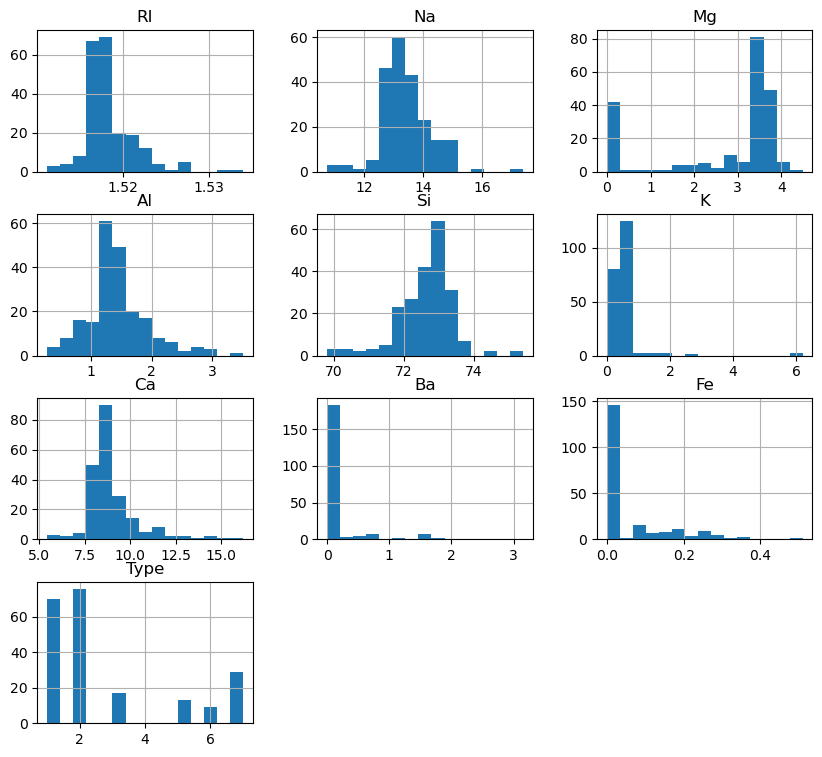

In [211]:
# data visualization 
import matplotlib.pyplot as plt 
import seaborn as sns 

# histograms 
data.hist(bins=15,figsize=(10,9))
plt.show()


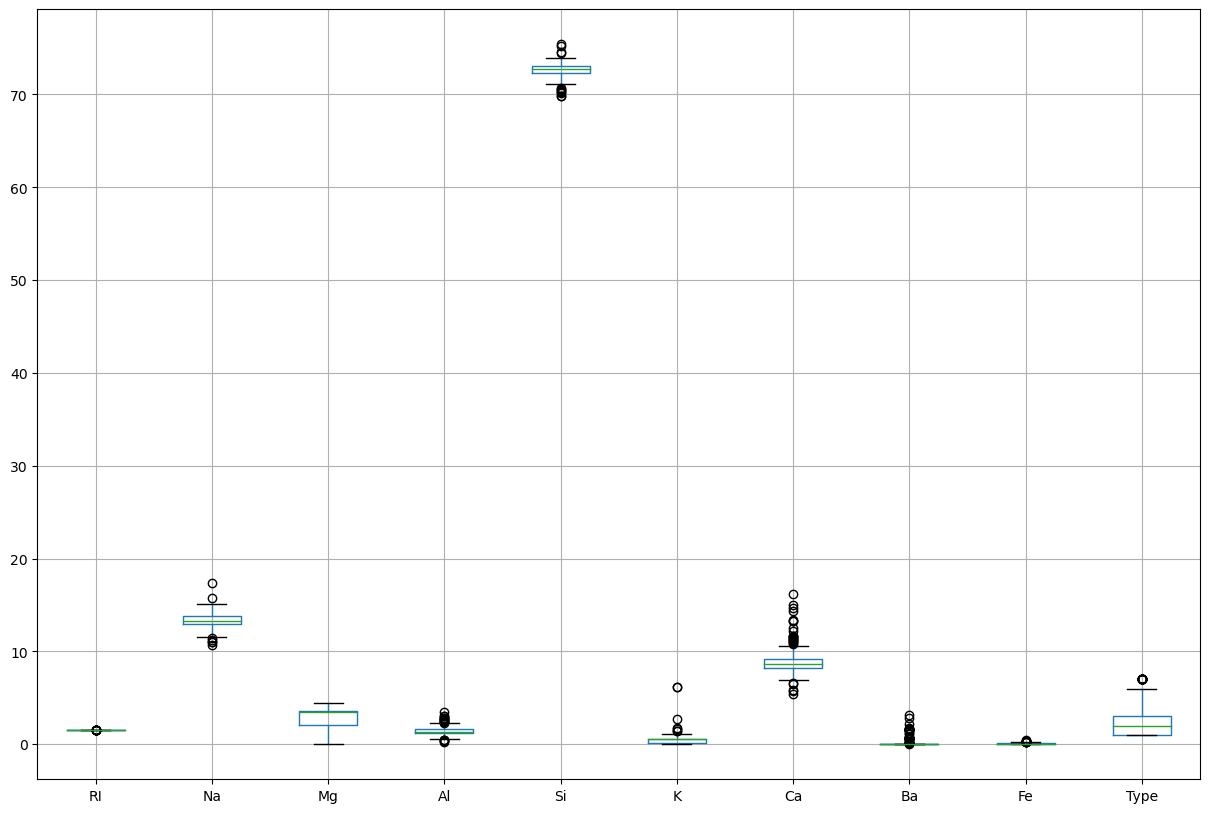

In [212]:
# boxplot
plt.figure(figsize=(15,10))
data.boxplot()
plt.show()

<Axes: >

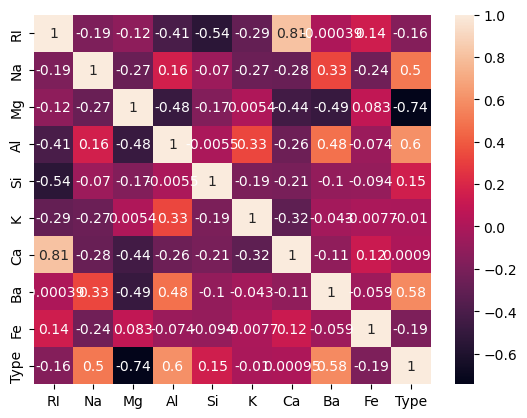

In [213]:
# correlations
sns.heatmap(data.corr(),annot=True)

In [214]:
# split the features and target 
features=data.drop('Type',axis=1) # features 
print(features)
target=data["Type"]   # target
print(target)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0

[214 rows x 9 columns]
0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64


In [215]:
# Standardization 
sta_sca=StandardScaler()
features_scaled=sta_sca.fit_transform(features)
print(features_scaled)

[[ 0.87286765  0.28495326  1.25463857 ... -0.14576634 -0.35287683
  -0.5864509 ]
 [-0.24933347  0.59181718  0.63616803 ... -0.79373376 -0.35287683
  -0.5864509 ]
 [-0.72131806  0.14993314  0.60142249 ... -0.82894938 -0.35287683
  -0.5864509 ]
 ...
 [ 0.75404635  1.16872135 -1.86551055 ... -0.36410319  2.95320036
  -0.5864509 ]
 [-0.61239854  1.19327046 -1.86551055 ... -0.33593069  2.81208731
  -0.5864509 ]
 [-0.41436305  1.00915211 -1.86551055 ... -0.23732695  3.01367739
  -0.5864509 ]]


In [249]:
# Using Isolation forest method to detect outliers 
iso_forest=IsolationForest(contamination=0.1,random_state=42)
outliers=iso_forest.fit_predict(features_scaled)

In [279]:
# add the outlier flag 
data["Outlier"]=outliers
print("Isolation Forest applied:-")
print(data.head())

Isolation Forest applied:-
        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type  Outlier
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1        1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1        1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1        1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1        1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1        1


In [216]:
# split the train & test model
x_train,x_test,y_train,y_test=train_test_split(features_scaled,target,train_size=0.8,random_state=42)
print(x_train.shape)
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)

(171, 9)
(171, 9)
(171,)
(43,)


In [217]:
#initialize the Random Forest Classifier 
rf_model =RandomForestClassifier(random_state=42)

# train the model 
rf_model.fit(x_train,y_train)


RandomForestClassifier(random_state=42)

In [218]:
# make predictions 
y_pred_random=rf_model.predict(x_test)

In [219]:
# Evaluate the model 
print("Accuracy:-",accuracy_score(y_test,y_pred_random))
print("Classification report:-",classification_report(y_test,y_pred_random))
print("Recall_score",recall_score(y_test,y_pred_random,average="weighted"))
print("F1_score:-",f1_score(y_test,y_pred_random,average="weighted"))

Accuracy:- 0.8372093023255814
Classification report:-               precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.90      0.64      0.75        14
           3       1.00      0.67      0.80         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.91      0.84      0.86        43
weighted avg       0.87      0.84      0.83        43

Recall_score 0.8372093023255814
F1_score:- 0.8330452594474481


In [220]:
# initializae the Bagging Clasifier 
Bagging_model=BaggingClassifier(estimator=RandomForestClassifier(),n_estimators=10,random_state=42)
# train the model 
Bagging_model.fit(x_train,y_train)

BaggingClassifier(estimator=RandomForestClassifier(), random_state=42)

In [221]:
 # make predictions 
y_pred_bagging=Bagging_model.predict(x_test)

In [222]:
# Evaluate the model 
print("Accuracy:-",accuracy_score(y_test,y_pred_bagging))
print("Classification report:-",classification_report(y_test,y_pred_bagging))
print("Recall_score",recall_score(y_test,y_pred_bagging,average="weighted"))
print("F1_score:-",f1_score(y_test,y_pred_bagging,average="weighted"))

Accuracy:- 0.8604651162790697
Classification report:-               precision    recall  f1-score   support

           1       0.73      1.00      0.85        11
           2       0.85      0.79      0.81        14
           3       1.00      0.67      0.80         3
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         8

    accuracy                           0.86        43
   macro avg       0.93      0.83      0.85        43
weighted avg       0.88      0.86      0.86        43

Recall_score 0.8604651162790697
F1_score:- 0.855389915855032


In [223]:
# Initialize and train the AdaBoost classifier
boosting = AdaBoostClassifier(n_estimators=100, random_state=42)
boosting.fit(x_train, y_train)

# Make predictions
y_pred_boosting = boosting.predict(x_test)

# Evaluate the model
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
print(f'Boosting Accuracy: {accuracy_boosting:.2f}')
print('Boosting Classification Report:')
print(classification_report(y_test, y_pred_boosting))

Boosting Accuracy: 0.49
Boosting Classification Report:
              precision    recall  f1-score   support

           1       0.50      0.91      0.65        11
           2       0.35      0.43      0.39        14
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       0.75      1.00      0.86         3
           7       1.00      0.25      0.40         8

    accuracy                           0.49        43
   macro avg       0.43      0.43      0.38        43
weighted avg       0.48      0.49      0.43        43

